<a href="https://colab.research.google.com/github/12345997/Spambase-project/blob/main/WEEK_9_IP_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Defining the Question

### a) Specifying the Data Analytic Question
to use the k nearest neighbour classifier to predict whether a passenger servived the titanic or not

### b) Defining the Metric for Success
to use the train dataset to predict whether a passenger servived or not

### c) Understanding the context
the data was extracted from the titnic dataset where the columns ;age givess details of the various age groups, servied; tells whether a person servived or not; fare; the amount of money the person paid; Name; is the name of the person on who borded the titanic; the pclass gives the at which the passenger was on bord 

### d) Recording the Experimental Design
     Importing data
      previewing the dataset
       Data cleaning
        Exploratory data analysis
          KNneighbor



#2.importing the libraries 

In [1]:
#impporting libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Importing datasets

Train=pd.read_csv("/content/train (5).csv")


#3.previewing the dataset

In [6]:
#previewing our dataset
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
Train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#4.Data cleaning

In [9]:
#checking for null values
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#filling the Age column with the mean of the column data

Train["Age"].fillna(Train["Age"].mean(), inplace=True)


In [13]:
#filling the fare column with the mean of the column data
Train["Fare"].fillna(Train["Fare"].mean(), inplace=True)


In [15]:
#the cabin column had too many missing values hence i droped it
Train.drop(["Cabin"],axis=1, inplace=True)


In [14]:
#i also drpped passenger id because it was important for the analysis
Train.drop(["PassengerId"],axis=1, inplace=True)


In [18]:
# Dealing with the Missing Data
#
Train.duplicated().sum()


0

In [19]:
#dropping the the name, embarked and Tckect columns 
Train.drop(["Name","Ticket","Embarked"],axis=1, inplace=True)

the column a

In [20]:
Train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

#checking for outliers

In [21]:
# Using the IQR formula
Q1 = Train.quantile(0.25)
Q3 = Train.quantile(0.75)
IQR = Q3 - Q1
((Train < (Q1 - 1.5 * IQR)) | (Train > (Q3 + 1.5 * IQR))).sum()

Age          66
Fare        116
Parch       213
Pclass        0
Sex           0
SibSp        46
Survived      0
dtype: int64

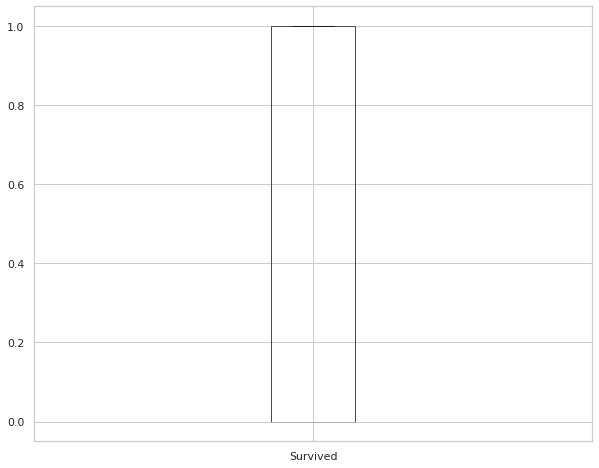

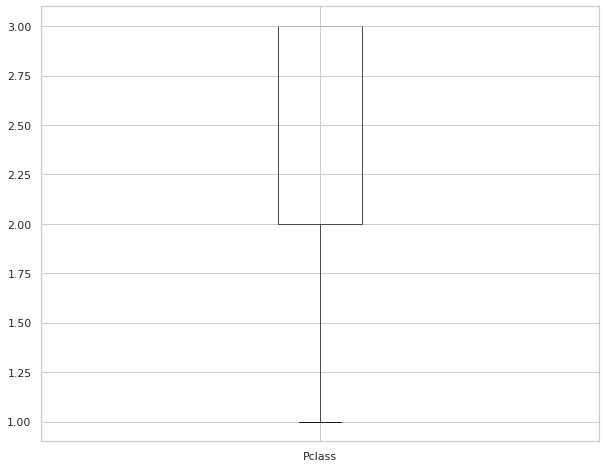

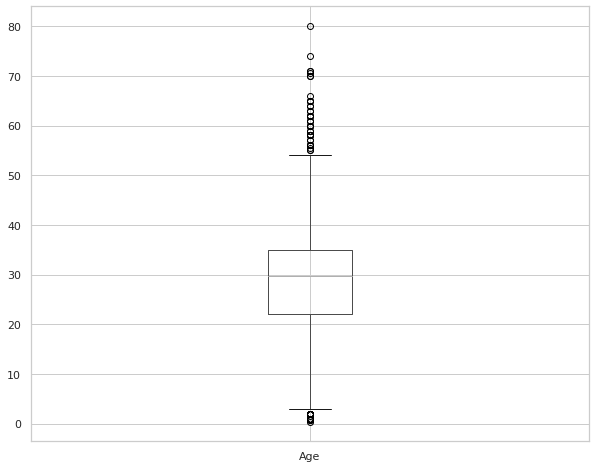

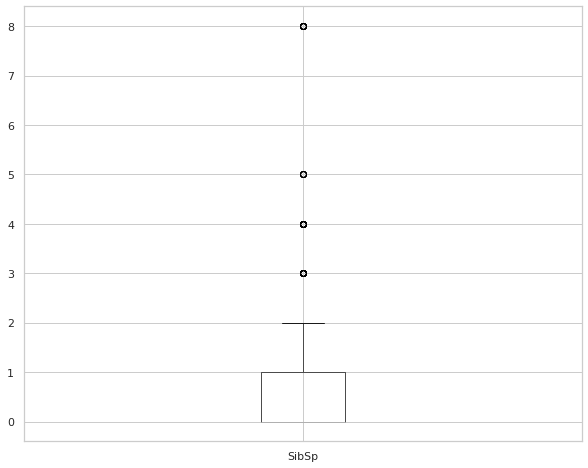

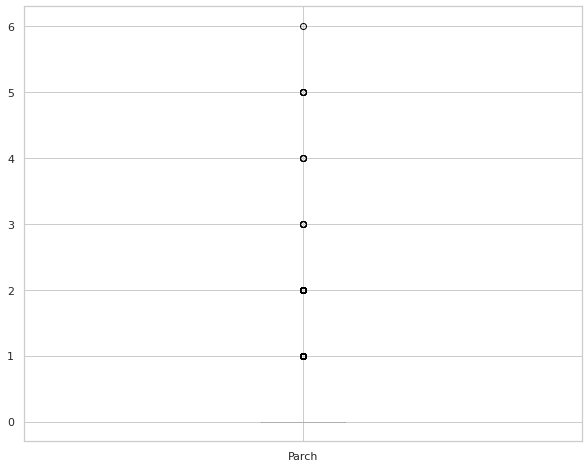

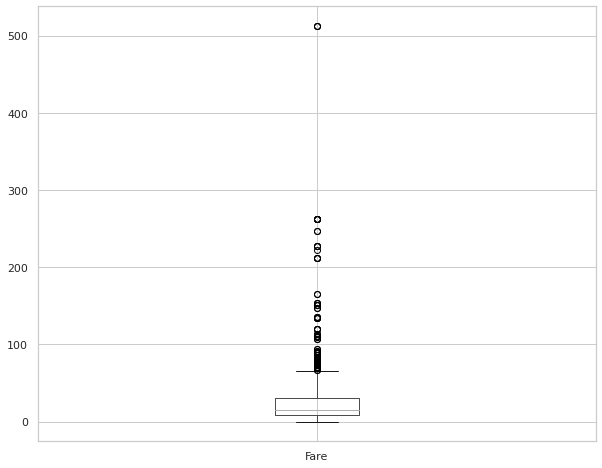

In [27]:
#import seaborn as sns


# Using boxplots to check for outliers
# --
#

num_cols = Train.select_dtypes('number').columns

for col in num_cols:
  plt.figure(figsize = (10, 8))
  Train.boxplot([col])

i failed to drop the outliers because they were an actual representation of the datset hence by dropping them it will make our data meaningless

#5.Exploratory Data Analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


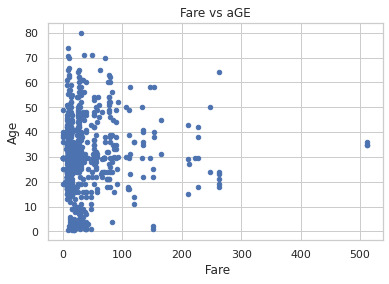

In [30]:
# Scatter plot between quantity ordered and sales

#
Train.plot(x = 'Fare', y = 'Age', kind='scatter')
plt.title('Fare vs aGE')
plt.xlabel(' Fare')
plt.ylabel('Age')
plt.show()

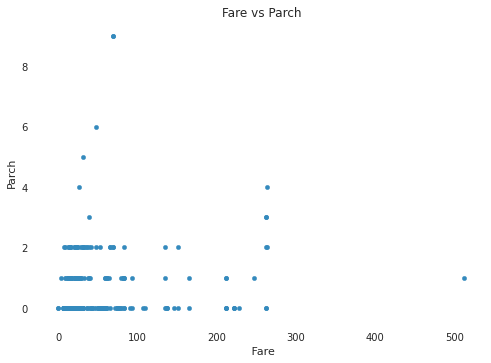

In [ ]:
# Scatter plot between quantity ordered and sales
Train.plot(x = 'Fare', y = 'Parch', kind='scatter')
plt.title('Fare vs Parch')
plt.xlabel(' Fare')
plt.ylabel('Parch')
plt.show()

##checking for collinearity

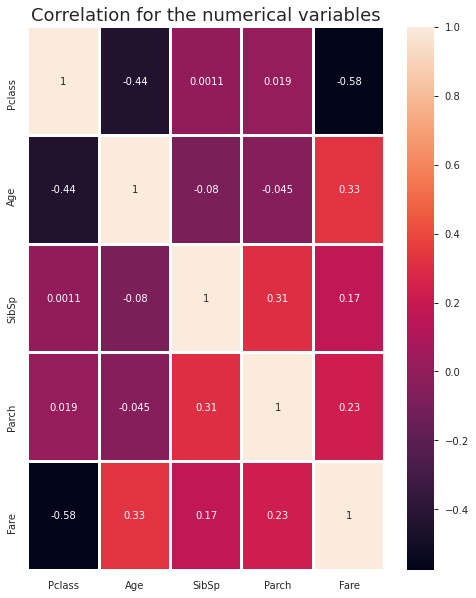

In [ ]:
# We could also use a heatmap to determine the correlation in our data
corr = Train.corr()
plt.figure(figsize=(8,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=2.0,annot=True)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

the columns in Train dataset had a lowly correlated  to each other with the highest with a positive correlation of 0.3 and a negative correlation of -0.58

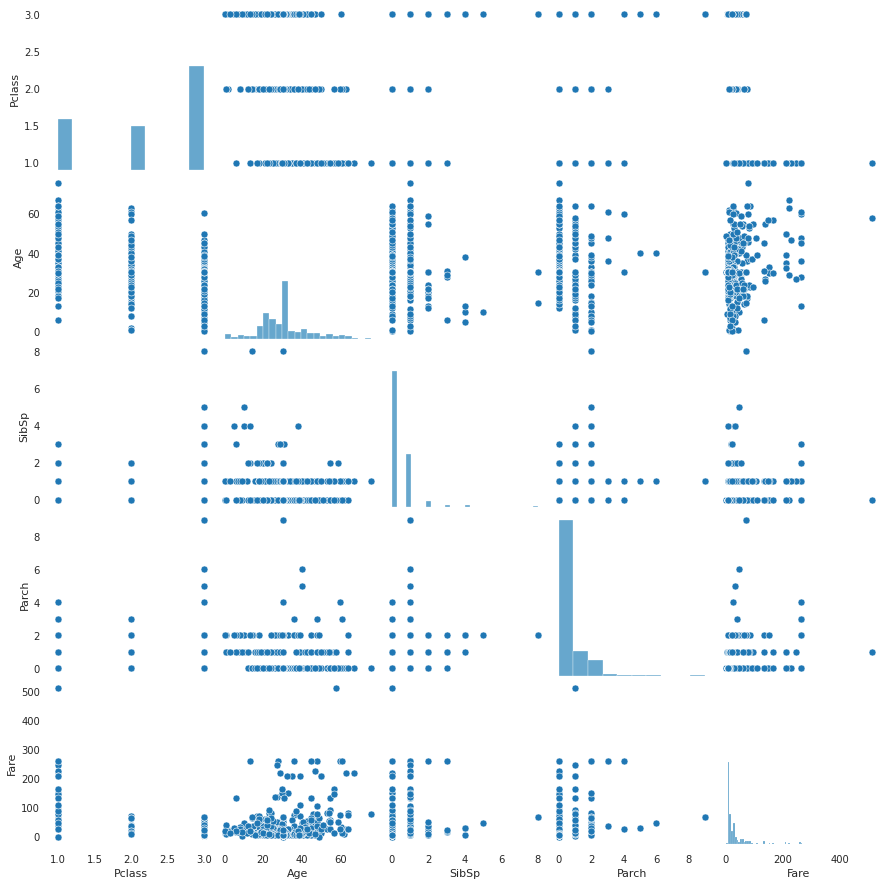

In [ ]:
sns.pairplot(Train)
plt.show()

#6.Implementing the solution

In [61]:
# Then loading our libraries
# 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [62]:
Train["Sex"] = np.where(Train["Sex"].str.contains("ohc"), 1, 0,)


In [63]:
Train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [65]:
# Splitting our data
# ---
# 
X = Train[['Pclass',"Sex",'Age','SibSp',"Parch","Fare"]]
y = Train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [66]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare
0         3    0  22.000000      1      0   7.2500
1         1    0  38.000000      1      0  71.2833
2         3    0  26.000000      0      0   7.9250
3         1    0  35.000000      1      0  53.1000
4         3    0  35.000000      0      0   8.0500
..      ...  ...        ...    ...    ...      ...
886       2    0  27.000000      0      0  13.0000
887       1    0  19.000000      0      0  30.0000
888       3    0  29.699118      1      2  23.4500
889       1    0  26.000000      0      0  30.0000
890       3    0  32.000000      0      0   7.7500

[891 rows x 6 columns]


In [67]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [68]:
# ---
# splitting th dataset into 80,20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
lda


LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [71]:
# standardizing my model to fit 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
#fitting my model to the algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
#checking for the values of y predict
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0])

In [74]:
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83 32]
 [26 38]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       115
           1       0.54      0.59      0.57        64

    accuracy                           0.68       179
   macro avg       0.65      0.66      0.65       179
weighted avg       0.68      0.68      0.68       179



#7.0 conclusion
   the prediction based on the KNeighbour classifier was 68% for a person to servive based on the parameters we fed on the model.